In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats, integrate
import seaborn as sns
file = pd.read_csv("human_resources.csv")
#crea copia dati su cui lavorare 
copy = pd.DataFrame([''])
copy = file
#rimpiazza valori di salary con valori numerici
copy.salary.replace(['low', 'medium','high'], [0, 1,2], inplace=True)

from collections import defaultdict
from collections import defaultdict
from scipy.stats.stats import pearsonr


C:\Users\Riccardo\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


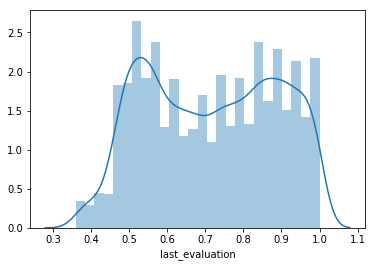

In [5]:
sns.distplot(copy['last_evaluation'])
plt.show()
#"YUUUUP" [0.9,1]

C:\Users\Riccardo\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


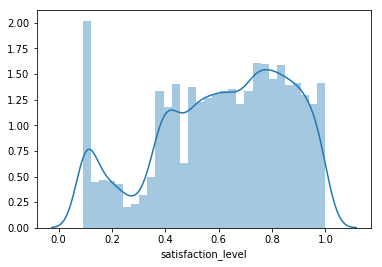

In [6]:
sns.distplot(copy['satisfaction_level'])
plt.show()
#"nice" [0.66,0.8]

C:\Users\Riccardo\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


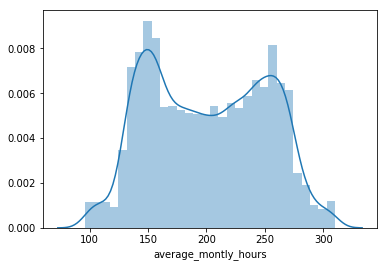

In [7]:
sns.distplot(copy['average_montly_hours'])
plt.show()
#[50,125] [126,140] [140,160][161,180][]

In [8]:
data = pd.DataFrame([''])
data = file
data.head()
mod = data

In [9]:
#pd.cut(data['average_montly_hours'], bins=range(90,320,20), include_lowest=True)

In [10]:
data['hours_cat'] = pd.cut(data['average_montly_hours'], 
                           [75,118,118.1,140,140.1,161,161.1,182,182.1,225,225.1,247,247.1,269,269.1,289,289.1,311])
data = data.drop(['average_montly_hours'],axis=1)
data.head()

satisfaction_level  last_evaluation  number_project  time_spend_company  \
0                0.38             0.53               2                   3   
1                0.80             0.86               5                   6   
2                0.11             0.88               7                   4   
3                0.72             0.87               5                   5   
4                0.37             0.52               2                   3   

   Work_accident  left  promotion_last_5years  sales  salary       hours_cat  
0              0     1                      0  sales       0  (140.1, 161.0]  
1              0     1                      0  sales       1  (247.1, 269.0]  
2              0     1                      0  sales       1  (269.1, 289.0]  
3              0     1                      0  sales       0  (182.1, 225.0]  
4              0     1                      0  sales       0  (140.1, 161.0]

In [11]:
#"notAtAll" [0,25]
#"nop" [0.26,4]
mod['satisfaction_level'] = pd.cut(data['satisfaction_level'],[0.00,0.25,0.251,0.40,0.651,0.8,0.801,1.0])
#"not at all" [0,0.5]
#"meh" [0.51,0.64]
mod['last_evaluation'] = pd.cut(data['last_evaluation'],[0,0.50,0.501,0.65,0.651,0.89,0.891,1.0])

In [12]:
mod['number_project'] = data['number_project'].astype(str) + '_NP'
mod['time_spend_company'] = data['time_spend_company'].astype(str) + '_T'
mod['Work_accident'] = data['Work_accident'].astype(str) + '_ACC'
mod['left'] = data['left'].astype(str) + '_L'
mod['promotion_last_5years'] = data['promotion_last_5years'].astype(str) + '_PR'
mod['sales'] = data['sales'].astype(str) + '_SALES'
mod['salary'] = data['salary'].astype(str) + '_SALARY'
mod['satisfaction_level'] = mod['satisfaction_level'].astype(str)
mod['last_evaluation'] = mod['last_evaluation'].astype(str)
mod['average_montly_hours'] = mod['hours_cat'].astype(str)
mod.drop('hours_cat',axis=1,inplace=True)

In [13]:
mod.head()

satisfaction_level last_evaluation number_project average_montly_hours  \
0       (0.251, 0.4]   (0.501, 0.65]           2_NP       (140.1, 161.0]   
1       (0.651, 0.8]   (0.651, 0.89]           5_NP       (247.1, 269.0]   
2        (0.0, 0.25]   (0.651, 0.89]           7_NP       (269.1, 289.0]   
3       (0.651, 0.8]   (0.651, 0.89]           5_NP       (182.1, 225.0]   
4       (0.251, 0.4]   (0.501, 0.65]           2_NP       (140.1, 161.0]   

  time_spend_company Work_accident left promotion_last_5years        sales  \
0                3_T         0_ACC  1_L                  0_PR  sales_SALES   
1                6_T         0_ACC  1_L                  0_PR  sales_SALES   
2                4_T         0_ACC  1_L                  0_PR  sales_SALES   
3                5_T         0_ACC  1_L                  0_PR  sales_SALES   
4                3_T         0_ACC  1_L                  0_PR  sales_SALES   

     salary  
0  0_SALARY  
1  1_SALARY  
2  1_SALARY  
3  0_SALARY  
4  0_SALARY

In [14]:
mod['last_evaluation'].unique()

array(['(0.501, 0.65]', '(0.651, 0.89]', '(0.0, 0.5]', '(0.891, 1.0]'], dtype=object)

In [15]:
mod['average_montly_hours'].unique()

array(['(140.1, 161.0]', '(247.1, 269.0]', '(269.1, 289.0]',
       '(182.1, 225.0]', '(225.1, 247.0]', '(118.1, 140.0]',
       '(289.1, 311.0]', '(161.1, 182.0]', '(75.0, 118.0]'], dtype=object)

In [13]:
mod.satisfaction_level.replace(['(0.0, 0.25]','(0.251, 0.4]','(0.4, 0.651]','(0.651, 0.8]','(0.801, 1.0]'],
                               ['Very_low_sat','Low_sat','Medium_sat','High_sat','Very_high_sat'], inplace=True)
mod.last_evaluation.replace(['(0.0, 0.5]','(0.501, 0.65]','(0.651, 0.89]','(0.891, 1.0]'],
                               ['Low_grade','Medium_grade','High_grade','Very_high_grade'], inplace=True)
mod.average_montly_hours.replace(['(75.0, 118.0]','(118.1, 140.0]','(140.1, 161.0]','(161.1, 182.0]','(182.1, 225.0]','(225.1, 247.0]','(247.1, 269.0]','(269.1, 289.0]','(289.1, 311.0]'],
                                 ['[80,118]_H','[119,140]_H','[140,161]_H','[162,182]_H','[183,225]_H','[226,247]_H','[248,269]_H','[270,289]_H','[290,311]_H'],inplace=True)

In [14]:
mod.head()

satisfaction_level last_evaluation number_project average_montly_hours  \
0            Low_sat    Medium_grade           2_NP          [140,161]_H   
1           High_sat      High_grade           5_NP          [248,269]_H   
2       Very_low_sat      High_grade           7_NP          [270,289]_H   
3           High_sat      High_grade           5_NP          [183,225]_H   
4            Low_sat    Medium_grade           2_NP          [140,161]_H   

  time_spend_company Work_accident left promotion_last_5years        sales  \
0                3_T         0_ACC  1_L                  0_PR  sales_SALES   
1                6_T         0_ACC  1_L                  0_PR  sales_SALES   
2                4_T         0_ACC  1_L                  0_PR  sales_SALES   
3                5_T         0_ACC  1_L                  0_PR  sales_SALES   
4                3_T         0_ACC  1_L                  0_PR  sales_SALES   

     salary  
0  0_SALARY  
1  1_SALARY  
2  1_SALARY  
3  0_SALARY  
4  0_SALARY

In [15]:
mod['average_montly_hours'].unique()

array(['[140,161]_H', '[248,269]_H', '[270,289]_H', '[183,225]_H',
       '[226,247]_H', '[119,140]_H', '[290,311]_H', '[162,182]_H',
       '[80,118]_H'], dtype=object)

In [16]:
mod['satisfaction_level'].unique()

array(['Low_sat', 'High_sat', 'Very_low_sat', 'Medium_sat', 'Very_high_sat'], dtype=object)

In [17]:
mod['last_evaluation'].unique()

array(['Medium_grade', 'High_grade', 'Low_grade', 'Very_high_grade'], dtype=object)

In [18]:
mod.head()

satisfaction_level last_evaluation number_project average_montly_hours  \
0            Low_sat    Medium_grade           2_NP          [140,161]_H   
1           High_sat      High_grade           5_NP          [248,269]_H   
2       Very_low_sat      High_grade           7_NP          [270,289]_H   
3           High_sat      High_grade           5_NP          [183,225]_H   
4            Low_sat    Medium_grade           2_NP          [140,161]_H   

  time_spend_company Work_accident left promotion_last_5years        sales  \
0                3_T         0_ACC  1_L                  0_PR  sales_SALES   
1                6_T         0_ACC  1_L                  0_PR  sales_SALES   
2                4_T         0_ACC  1_L                  0_PR  sales_SALES   
3                5_T         0_ACC  1_L                  0_PR  sales_SALES   
4                3_T         0_ACC  1_L                  0_PR  sales_SALES   

     salary  
0  0_SALARY  
1  1_SALARY  
2  1_SALARY  
3  0_SALARY  
4  0_SALARY

In [19]:
mod.to_csv('human_pattern.csv', sep=',', header=True)

In [20]:
hr_baskets_list = list()
for row in mod.values:
    hr_baskets_list.append(list(row))

In [21]:
len(hr_baskets_list)

14999

# **PATTERN**

In [48]:
frequent10= fim.apriori(hr_baskets_list, supp=10, zmin=3, target = 's')
frequent20= fim.apriori(hr_baskets_list, supp=20, zmin=3, target = 's')
frequent30= fim.apriori(hr_baskets_list, supp=30, zmin=3, target = 's')

In [26]:
print(len(frequent10))
print(len(frequent20))
print(len(frequent30))

213
38
9


In [49]:
frequent10.sort(key=lambda pattern: pattern[1], reverse=True)
frequent10

[(('0_L', '0_ACC', '0_PR'), 9200),
 (('0_SALARY', '0_ACC', '0_PR'), 6228),
 (('3_T', '0_ACC', '0_PR'), 5446),
 (('1_SALARY', '0_ACC', '0_PR'), 5371),
 (('0_SALARY', '0_L', '0_PR'), 5092),
 (('1_SALARY', '0_L', '0_PR'), 4953),
 (('High_grade', '0_ACC', '0_PR'), 4911),
 (('High_grade', '0_L', '0_PR'), 4813),
 (('3_T', '0_L', '0_PR'), 4738),
 (('1_SALARY', '0_L', '0_ACC'), 4266),
 (('0_SALARY', '0_L', '0_ACC'), 4199),
 (('0_SALARY', '0_L', '0_ACC', '0_PR'), 4162),
 (('1_SALARY', '0_L', '0_ACC', '0_PR'), 4132),
 (('High_grade', '0_L', '0_ACC'), 4095),
 (('3_T', '0_L', '0_ACC'), 4036),
 (('High_grade', '0_L', '0_ACC', '0_PR'), 3996),
 (('3_T', '0_L', '0_ACC', '0_PR'), 3946),
 (('3_NP', '0_L', '0_PR'), 3888),
 (('4_NP', '0_L', '0_PR'), 3843),
 (('Medium_sat', '0_ACC', '0_PR'), 3818),
 (('Medium_sat', '0_L', '0_PR'), 3618),
 (('4_NP', '0_ACC', '0_PR'), 3590),
 (('Medium_grade', '0_ACC', '0_PR'), 3484),
 (('sales_SALES', '0_ACC', '0_PR'), 3482),
 (('1_L', '0_ACC', '0_PR'), 3387),
 (('Very_high

In [29]:
frequent20.sort(key=lambda pattern: pattern[1], reverse=True)
frequent20

[(('0_L', '0_ACC', '0_PR'), 9200),
 (('0_SALARY', '0_ACC', '0_PR'), 6228),
 (('3_T', '0_ACC', '0_PR'), 5446),
 (('1_SALARY', '0_ACC', '0_PR'), 5371),
 (('0_SALARY', '0_L', '0_PR'), 5092),
 (('1_SALARY', '0_L', '0_PR'), 4953),
 (('High_grade', '0_ACC', '0_PR'), 4911),
 (('High_grade', '0_L', '0_PR'), 4813),
 (('3_T', '0_L', '0_PR'), 4738),
 (('1_SALARY', '0_L', '0_ACC'), 4266),
 (('0_SALARY', '0_L', '0_ACC'), 4199),
 (('0_SALARY', '0_L', '0_ACC', '0_PR'), 4162),
 (('1_SALARY', '0_L', '0_ACC', '0_PR'), 4132),
 (('High_grade', '0_L', '0_ACC'), 4095),
 (('3_T', '0_L', '0_ACC'), 4036),
 (('High_grade', '0_L', '0_ACC', '0_PR'), 3996),
 (('3_T', '0_L', '0_ACC', '0_PR'), 3946),
 (('3_NP', '0_L', '0_PR'), 3888),
 (('4_NP', '0_L', '0_PR'), 3843),
 (('Medium_sat', '0_ACC', '0_PR'), 3818),
 (('Medium_sat', '0_L', '0_PR'), 3618),
 (('4_NP', '0_ACC', '0_PR'), 3590),
 (('Medium_grade', '0_ACC', '0_PR'), 3484),
 (('sales_SALES', '0_ACC', '0_PR'), 3482),
 (('1_L', '0_ACC', '0_PR'), 3387),
 (('Very_high

In [30]:
frequent30.sort(key=lambda pattern: pattern[1], reverse=True)
frequent30

[(('0_L', '0_ACC', '0_PR'), 9200),
 (('0_SALARY', '0_ACC', '0_PR'), 6228),
 (('3_T', '0_ACC', '0_PR'), 5446),
 (('1_SALARY', '0_ACC', '0_PR'), 5371),
 (('0_SALARY', '0_L', '0_PR'), 5092),
 (('1_SALARY', '0_L', '0_PR'), 4953),
 (('High_grade', '0_ACC', '0_PR'), 4911),
 (('High_grade', '0_L', '0_PR'), 4813),
 (('3_T', '0_L', '0_PR'), 4738)]

In [ ]:
help(fim.apriori)

In [34]:
closed10= fim.apriori(hr_baskets_list, supp=10, zmin=3, target = 'c')
closed20= fim.apriori(hr_baskets_list, supp=20, zmin=3, target = 'c')
closed30= fim.apriori(hr_baskets_list, supp=30, zmin=3, target = 'c')

In [37]:
closed10.sort(key=lambda pattern: pattern[1], reverse=True)
closed20.sort(key=lambda pattern: pattern[1], reverse=True)
closed30.sort(key=lambda pattern: pattern[1], reverse=True)
closed10

[(('0_L', '0_ACC', '0_PR'), 9200),
 (('0_SALARY', '0_ACC', '0_PR'), 6228),
 (('3_T', '0_ACC', '0_PR'), 5446),
 (('1_SALARY', '0_ACC', '0_PR'), 5371),
 (('0_SALARY', '0_L', '0_PR'), 5092),
 (('1_SALARY', '0_L', '0_PR'), 4953),
 (('High_grade', '0_ACC', '0_PR'), 4911),
 (('High_grade', '0_L', '0_PR'), 4813),
 (('3_T', '0_L', '0_PR'), 4738),
 (('1_SALARY', '0_L', '0_ACC'), 4266),
 (('0_SALARY', '0_L', '0_ACC'), 4199),
 (('0_SALARY', '0_L', '0_ACC', '0_PR'), 4162),
 (('1_SALARY', '0_L', '0_ACC', '0_PR'), 4132),
 (('High_grade', '0_L', '0_ACC'), 4095),
 (('3_T', '0_L', '0_ACC'), 4036),
 (('High_grade', '0_L', '0_ACC', '0_PR'), 3996),
 (('3_T', '0_L', '0_ACC', '0_PR'), 3946),
 (('3_NP', '0_L', '0_PR'), 3888),
 (('4_NP', '0_L', '0_PR'), 3843),
 (('Medium_sat', '0_ACC', '0_PR'), 3818),
 (('Medium_sat', '0_L', '0_PR'), 3618),
 (('4_NP', '0_ACC', '0_PR'), 3590),
 (('Medium_grade', '0_ACC', '0_PR'), 3484),
 (('sales_SALES', '0_ACC', '0_PR'), 3482),
 (('1_L', '0_ACC', '0_PR'), 3387),
 (('Very_high

In [38]:
closed20

[(('0_L', '0_ACC', '0_PR'), 9200),
 (('0_SALARY', '0_ACC', '0_PR'), 6228),
 (('3_T', '0_ACC', '0_PR'), 5446),
 (('1_SALARY', '0_ACC', '0_PR'), 5371),
 (('0_SALARY', '0_L', '0_PR'), 5092),
 (('1_SALARY', '0_L', '0_PR'), 4953),
 (('High_grade', '0_ACC', '0_PR'), 4911),
 (('High_grade', '0_L', '0_PR'), 4813),
 (('3_T', '0_L', '0_PR'), 4738),
 (('1_SALARY', '0_L', '0_ACC'), 4266),
 (('0_SALARY', '0_L', '0_ACC'), 4199),
 (('0_SALARY', '0_L', '0_ACC', '0_PR'), 4162),
 (('1_SALARY', '0_L', '0_ACC', '0_PR'), 4132),
 (('High_grade', '0_L', '0_ACC'), 4095),
 (('3_T', '0_L', '0_ACC'), 4036),
 (('High_grade', '0_L', '0_ACC', '0_PR'), 3996),
 (('3_T', '0_L', '0_ACC', '0_PR'), 3946),
 (('3_NP', '0_L', '0_PR'), 3888),
 (('4_NP', '0_L', '0_PR'), 3843),
 (('Medium_sat', '0_ACC', '0_PR'), 3818),
 (('Medium_sat', '0_L', '0_PR'), 3618),
 (('4_NP', '0_ACC', '0_PR'), 3590),
 (('Medium_grade', '0_ACC', '0_PR'), 3484),
 (('sales_SALES', '0_ACC', '0_PR'), 3482),
 (('1_L', '0_ACC', '0_PR'), 3387),
 (('Very_high

In [39]:
closed30

[(('0_L', '0_ACC', '0_PR'), 9200),
 (('0_SALARY', '0_ACC', '0_PR'), 6228),
 (('3_T', '0_ACC', '0_PR'), 5446),
 (('1_SALARY', '0_ACC', '0_PR'), 5371),
 (('0_SALARY', '0_L', '0_PR'), 5092),
 (('1_SALARY', '0_L', '0_PR'), 4953),
 (('High_grade', '0_ACC', '0_PR'), 4911),
 (('High_grade', '0_L', '0_PR'), 4813),
 (('3_T', '0_L', '0_PR'), 4738)]

In [41]:
maximal10 = fim.apriori(hr_baskets_list, supp=10, zmin=3, target = 'm')
maximal20 = fim.apriori(hr_baskets_list, supp=20, zmin=3, target = 'm')
maximal30 = fim.apriori(hr_baskets_list, supp=30, zmin=3, target = 'm')

In [42]:
maximal10.sort(key=lambda pattern: pattern[1], reverse=True)
maximal20.sort(key=lambda pattern: pattern[1], reverse=True)
maximal30.sort(key=lambda pattern: pattern[1], reverse=True)
maximal10

[(('4_NP', '0_L', '0_ACC', '0_PR'), 3211),
 (('3_NP', '0_L', '0_ACC', '0_PR'), 3200),
 (('Medium_sat', '0_L', '0_ACC', '0_PR'), 2998),
 (('Very_high_sat', '0_L', '0_ACC', '0_PR'), 2788),
 (('Medium_grade', '0_L', '0_ACC', '0_PR'), 2617),
 (('2_T', '0_L', '0_ACC', '0_PR'), 2590),
 (('[183,225]_H', '0_L', '0_ACC', '0_PR'), 2558),
 (('sales_SALES', '0_L', '0_ACC', '0_PR'), 2517),
 (('High_sat', '0_L', '0_ACC', '0_PR'), 2299),
 (('4_T', '0_ACC', '0_PR'), 2213),
 (('[140,161]_H', '0_ACC', '0_PR'), 2169),
 (('1_L', '0_SALARY', '0_ACC', '0_PR'), 2066),
 (('Medium_sat', '3_T', '0_ACC', '0_PR'), 2039),
 (('Medium_grade', '3_T', '0_ACC', '0_PR'), 1988),
 (('1_ACC', '0_L', '0_PR'), 1928),
 (('[248,269]_H', '0_ACC', '0_PR'), 1873),
 (('support_SALES', '0_ACC', '0_PR'), 1868),
 (('3_T', '0_SALARY', '0_L', '0_ACC', '0_PR'), 1830),
 (('Medium_sat', '0_SALARY', '0_ACC', '0_PR'), 1824),
 (('4_NP', '0_SALARY', '0_L', '0_PR'), 1820),
 (('sales_SALES', '0_SALARY', '0_ACC', '0_PR'), 1819),
 (('High_grade',

In [43]:
maximal20

[(('0_SALARY', '0_L', '0_ACC', '0_PR'), 4162),
 (('1_SALARY', '0_L', '0_ACC', '0_PR'), 4132),
 (('High_grade', '0_L', '0_ACC', '0_PR'), 3996),
 (('3_T', '0_L', '0_ACC', '0_PR'), 3946),
 (('Medium_sat', '0_ACC', '0_PR'), 3818),
 (('Medium_sat', '0_L', '0_PR'), 3618),
 (('Medium_grade', '0_ACC', '0_PR'), 3484),
 (('sales_SALES', '0_ACC', '0_PR'), 3482),
 (('1_L', '0_ACC', '0_PR'), 3387),
 (('Very_high_sat', '0_L', '0_PR'), 3363),
 (('Very_high_sat', '0_ACC', '0_PR'), 3304),
 (('4_NP', '0_L', '0_ACC', '0_PR'), 3211),
 (('3_NP', '0_L', '0_ACC', '0_PR'), 3200),
 (('Medium_grade', '0_L', '0_PR'), 3182),
 (('3_T', '0_SALARY', '0_PR'), 3173),
 (('2_T', '0_L', '0_PR'), 3137),
 (('[183,225]_H', '0_L', '0_PR'), 3108),
 (('Medium_sat', '0_L', '0_ACC'), 3063),
 (('sales_SALES', '0_L', '0_PR'), 3033)]

In [44]:
maximal30

[(('0_L', '0_ACC', '0_PR'), 9200),
 (('0_SALARY', '0_ACC', '0_PR'), 6228),
 (('3_T', '0_ACC', '0_PR'), 5446),
 (('1_SALARY', '0_ACC', '0_PR'), 5371),
 (('0_SALARY', '0_L', '0_PR'), 5092),
 (('1_SALARY', '0_L', '0_PR'), 4953),
 (('High_grade', '0_ACC', '0_PR'), 4911),
 (('High_grade', '0_L', '0_PR'), 4813),
 (('3_T', '0_L', '0_PR'), 4738)]

In [45]:
help(fim.apriori)

Help on built-in function apriori in module fim:

apriori(...)
    apriori (tracts, target='s', supp=10, zmin=1, zmax=None, report='a',
             eval='x', agg='x', thresh=10, prune=None, algo='b', mode='',
             border=None)
    Find frequent item sets with the Apriori algorithm.
    tracts  transaction database to mine (mandatory)
            The database must be an iterable of transactions;
            each transaction must be an iterable of items;
            each item must be a hashable object.
            If the database is a dictionary, the transactions are
            the keys, the values their (integer) multiplicities.
    target  type of frequent item sets to find     (default: s)
            s/a   sets/all   all     frequent item sets
            c     closed     closed  frequent item sets
            m     maximal    maximal frequent item sets
            g     gens       generators
            r     rules      association rules
    supp    minimum support of an i

# **ASSOCIATION RULES**

In [62]:
rules = fim.apriori(hr_baskets_list,target='r',supp=10,zmin=2,report='ascl',conf=80)

In [103]:
rules20 = fim.apriori(hr_baskets_list,target='r',supp=20,zmin=2,report='ascl',conf=80)
#estrai regole che involvono chi ha lasciato e chi no
left = list()
stayed = list()
for x in rules20:
    if x[0] == '1_L':
        left.append(x)
    elif x[0] == '0_L':
        stayed.append(x)
len(left), len(stayed)

#minsupp 20 non trova nessuna regola che ha a che fare con quelli che hanno lasciato, con qualsiasi valore di confidence

(0, 24)

In [63]:
len(rules)

505

In [71]:
#sort rules by lift
rules.sort(key= lambda rule:rule[5],reverse=True)
rules

[('2_NP',
  ('1_L', '3_T', '0_PR'),
  1516,
  0.10107340489365958,
  0.9649904519414386,
  6.061093713848257),
 ('2_NP',
  ('1_L', '3_T', '0_ACC', '0_PR'),
  1446,
  0.09640642709513968,
  0.964,
  6.05487269681742),
 ('2_NP',
  ('1_L', '3_T'),
  1528,
  0.1018734582305487,
  0.9634300126103404,
  6.051292612706238),
 ('2_NP',
  ('1_L', '3_T', '0_ACC'),
  1455,
  0.09700646709780653,
  0.9623015873015873,
  6.044204986573077),
 ('1_L',
  ('2_NP', '3_T', '0_ACC', '0_PR'),
  1446,
  0.09640642709513968,
  0.8431486880466472,
  3.5414133777685977),
 ('1_L',
  ('2_NP', '3_T', '0_ACC'),
  1455,
  0.09700646709780653,
  0.842501447596989,
  3.5386948228807724),
 ('1_L',
  ('2_NP', '3_T', '0_PR'),
  1516,
  0.10107340489365958,
  0.8243610657966286,
  3.4625011553860636),
 ('1_L',
  ('2_NP', '3_T'),
  1528,
  0.1018734582305487,
  0.8241639697950378,
  3.461673308024579),
 ('3_T',
  ('2_NP', '1_L'),
  1528,
  0.1018734582305487,
  0.9751116783663051,
  2.2700139785528806),
 ('3_T',
  ('2_NP',

In [72]:
#estrai regole piÃ¹ interessanti (con lift > 1.05)
interesting = list()
min_lift = 1.05
for x in rules:
    if x[5] > min_lift:
        interesting.append(x)
len(interesting)

119

In [73]:
#estrai regole che involvono chi ha lasciato e chi no
left = list()
stayed = list()
for x in rules:
    if x[0] == '1_L':
        left.append(x)
    elif x[0] == '0_L':
        stayed.append(x)
len(left), len(stayed)

(4, 95)

In [80]:
#regole interessanti (lift > 1.05) per chi ha lasciato e chi no
min_lift = 1.05
intLeft = list()
intStayed = list()

for x in left:
    if x[5] > min_lift:
        intLeft.append(x)
for x in stayed:
    if x[5] > min_lift:
        intStayed.append(x)    
        
len(intLeft), len(intStayed)

(4, 95)

In [96]:
intLeft.sort(key=lambda rule: rule[5], reverse=True)
for x in intLeft:
    print(x)

('1_L', ('2_NP', '3_T', '0_ACC', '0_PR'), 1446, 0.09640642709513968, 0.8431486880466472, 3.5414133777685977)
('1_L', ('2_NP', '3_T', '0_ACC'), 1455, 0.09700646709780653, 0.842501447596989, 3.5386948228807724)
('1_L', ('2_NP', '3_T', '0_PR'), 1516, 0.10107340489365958, 0.8243610657966286, 3.4625011553860636)
('1_L', ('2_NP', '3_T'), 1528, 0.1018734582305487, 0.8241639697950378, 3.461673308024579)


In [94]:
intStayed.sort(key=lambda rule: rule[5], reverse=True)
for y in intStayed:
    print (y)

('0_L', ('Very_high_sat', '3_T'), 1564, 0.10427361824121609, 0.9987228607918263, 1.3108019066342844)
('0_L', ('Very_high_sat', '3_T', '0_PR'), 1519, 0.10127341822788186, 0.9986850756081526, 1.3107523144073048)
('0_L', ('3_NP', '3_T'), 1773, 0.11820788052536836, 0.9949494949494949, 1.3058494465127297)
('0_L', ('3_NP', '3_T', '0_PR'), 1738, 0.11587439162610841, 0.994848311390956, 1.3057166453056481)
('0_L', ('4_NP', '3_T', '0_PR'), 1713, 0.11420761384092273, 0.9878892733564014, 1.2965830601218642)
('0_L', ('High_grade', '3_T'), 2084, 0.1389425961730782, 0.9876777251184834, 1.296305407687446)
('0_L', ('High_grade', '3_T', '0_PR'), 2025, 0.13500900060004, 0.9873232569478303, 1.2958401759678428)
('0_L', ('4_NP', '3_T'), 1774, 0.11827455163677579, 0.9866518353726362, 1.294958949838482)
('0_L', ('2_T', '0_SALARY'), 1505, 0.10034002266817788, 0.9855926653569089, 1.2935688123633424)
('0_L', ('2_T', '0_SALARY', '0_PR'), 1497, 0.09980665377691846, 0.9855167873601053, 1.293469224152452)
('0_L', ('

In [88]:
print(intStayed[0])

('0_L', ('Very_high_sat', '3_T'), 1564, 0.10427361824121609, 0.9987228607918263, 1.3108019066342844)


In [87]:
print(intLeft[0])

('1_L', ('2_NP', '3_T', '0_ACC', '0_PR'), 1446, 0.09640642709513968, 0.8431486880466472, 3.5414133777685977)


In [ ]:
from __future__ import division

In [90]:
#accuracy for left
counter = 0
c_left = 0
c_not_left = 0
for row in hr_baskets_list:
    if '2_NP' in row and '3_T' in row:
        counter += 1
    if '2_NP' in row and '3_T' in row and '1_L' in row:
        c_left += 1
    if '2_NP' in row and '3_T' in row and '0_L' in row:
        c_not_left += 1
accuracy = (c_left/counter) * 100
print('counter', counter)
print('c_left', c_left)
print('c_not_left', c_not_left)
print('accuracy', accuracy)

counter 1854
c_left 1528
c_not_left 326
accuracy 82.41639697950379


In [92]:
#accuracy for stay
counter = 0
c_left = 0
c_not_left = 0
for row in hr_baskets_list:
    if '3_NP' in row:
        counter += 1
    if '3_NP' in row and '1_L' in row:
        c_left += 1
    if '3_NP' in row and '0_L' in row:
        c_not_left += 1
accuracy = (c_not_left/counter) * 100
print('counter', counter)
print('c_left', c_left)
print('c_not_left', c_not_left)
print('accuracy', accuracy)

counter 4055
c_left 72
c_not_left 3983
accuracy 98.22441430332923
